In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('/content/sales_train.csv')
test = pd.read_csv('/content/test.csv')
shops = pd.read_csv('/content/shops.csv')
items = pd.read_csv('/content/items.csv')
item_categories = pd.read_csv('/content/item_categories.csv')

**Train**

In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
train.shape

(2935849, 6)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


Пустых значений нет

In [43]:
train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

item_cnt_day имеет отрицательные значения

In [45]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


В большинстве случаев количество проданных товаров = 1

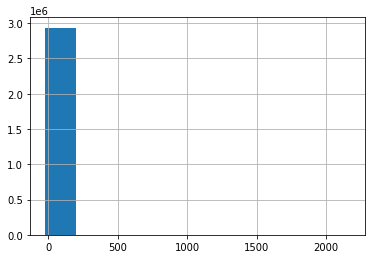

In [ ]:
train['item_cnt_day'].hist()

Есть отрицательные значения, при этом нет нулевых. Видна тенденция на уменьшение, поэтому, скорее всего, отрицательные значения не ошибка



In [48]:
train[train['item_cnt_day'] <= 0].groupby(by='item_cnt_day').agg(['count'])['item_id']

,count
item_cnt_day,
-22.0,1
-16.0,1
-9.0,1
-6.0,2
-5.0,4
-4.0,3
-3.0,14
-2.0,78
-1.0,7252


В 2015 году отрицательных значений уже не было

In [ ]:
train[train['item_cnt_day'] <= 0].sort_values(by='date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
105843,01.01.2013,0,37,9601,849.0,-1.0
26526,01.01.2013,0,27,12269,1499.0,-1.0
7894,01.01.2013,0,19,20383,1229.0,-1.0
82413,01.01.2013,0,54,3429,2799.0,-1.0
10621,01.01.2013,0,19,13086,1499.0,-1.0
...,...,...,...,...,...,...
2280870,31.12.2014,23,54,1865,2999.0,-1.0
2282834,31.12.2014,23,6,7018,1199.0,-1.0
2311383,31.12.2014,23,24,11659,499.0,-1.0
2240095,31.12.2014,23,31,21798,899.0,-1.0


Отрицательные значения практически не зависят от магазинов. Что подтверждает неслучайность распределения этих значений.

In [ ]:
train['shop_id'].unique().shape

(60,)

In [ ]:
train[train['item_cnt_day'] <= 0]['shop_id'].unique().shape

(54,)

И не зависит от товаров

In [ ]:
train[train['item_cnt_day'] <= 0]['item_id'].shape

(7356,)

In [ ]:
train[train['item_cnt_day'] <= 0]['item_id'].unique().shape

(3511,)

В среднем, это более дорогие товары

In [ ]:
train[train['item_cnt_day'] <= 0]['item_price'].mean()

1442.945622620988

Посмотрим общие продажи за все время

Виден тренд на снижение и сезонность

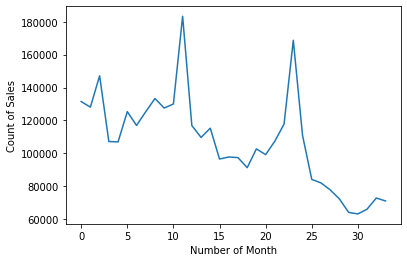

In [50]:
total_sales = train.groupby(by='date_block_num')['item_cnt_day'].sum()
plt.xlabel('Number of Month')
plt.ylabel('Count of Sales')
plt.plot(total_sales)

Скользящее среднее

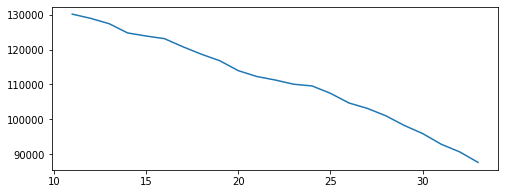

In [54]:
rolling_mean = total_sales.rolling(window=12).mean()
plt.figure(figsize=(8,3))
plt.plot(rolling_mean)

Найдем месяцы с наибольшими продажами

In [51]:
most_sold = train['date_block_num'].value_counts().sort_values(ascending=False)[:5]


На зимние месяцы приходится больше всего продаж. Ну и в целом, это даты перед праздниками

In [52]:
for month in most_sold.index:
  print(month, " ", train[train['date_block_num'] == month]['date'][:1])

11   1124316    04.12.2013
Name: date, dtype: object
23   2192637    24.12.2014
Name: date, dtype: object
2   224303    03.03.2013
Name: date, dtype: object
0   0    02.01.2013
Name: date, dtype: object
1   115690    21.02.2013
Name: date, dtype: object


**Test**

In [31]:
test.shape

(214200, 3)

In [32]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


Посмотрим, насколько одинаковы id магазинов в train и test

In [ ]:
test['shop_id'].unique().shape

(42,)

In [ ]:
train['shop_id'].unique().shape

(60,)

In [ ]:
test_set = set(test['shop_id'].unique())
train_set = set(train['shop_id'].unique())

Значит, все магазины, что есть в test, есть и в train. Поэтому можем использовать shop_id как фичу


In [ ]:
len(list(test_set - train_set))

0

Аналогично, и с item_id

Не все item, что есть в test, есть в train

In [34]:
test_item_set = set(test['item_id'].unique())
train_item_set = set(train['item_id'].unique())
len(list(test_item_set - train_item_set))

363

В train гораздо больше товаров, чем в test

In [35]:
len(list(train_item_set - test_item_set))

17070

Посмотрим тенденцию к продажам для наиболее продаваемого товара

In [46]:
group = train.groupby(by='item_id')['item_cnt_day', 'date'].sum().sort_values(by='item_cnt_day', ascending=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [45]:
most_sold_item = group[:1]
most_sold_item = list(most_sold_item.index)[0]

Также видная сезонность и тренд на снижение

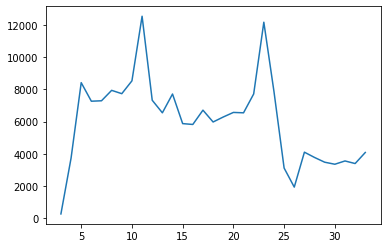

In [51]:
ms_train = train[train['item_id'] == most_sold_item]
most_sold_item_by_days = ms_train.groupby(by='date_block_num')['item_cnt_day'].sum()
plt.plot(most_sold_item_by_days)

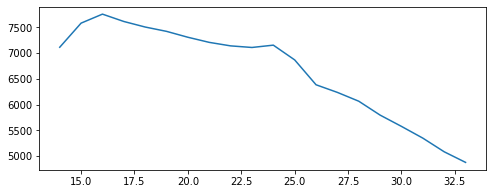

In [69]:
rolling_mean = most_sold_item_by_days.rolling(window=12).mean()
plt.figure(figsize=(8,3))
plt.plot(rolling_mean)

# DateTime 

In [7]:
train['date'] = train['date'].astype('datetime64[ns]')

In [8]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


Делаем дату индексом

In [9]:
train = train.set_index('date')

In [10]:
train['year'] = train.index.year
train['month'] = train.index.month
train['day'] = train.index.day

In [11]:
train['weekday name'] = train.index.weekday
train.head()


,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,weekday name
date,,,,,,,,,
2013-02-01,0,59,22154,999.00,1.0,2013,2,1,4
2013-03-01,0,25,2552,899.00,1.0,2013,3,1,4
2013-05-01,0,25,2552,899.00,-1.0,2013,5,1,2
2013-06-01,0,25,2554,1709.05,1.0,2013,6,1,5
2013-01-15,0,25,2555,1099.00,1.0,2013,1,15,1


# Продажи по дням

В первый день месяца резкое увеличение продаж. Скорее всего, это не отражает реальные продажи

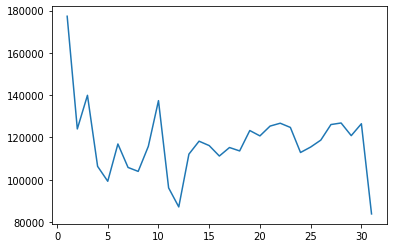

In [62]:
train_all = train.groupby(by='day')['item_cnt_day'].sum()
plt.plot(train_all)

# Продажи по годам

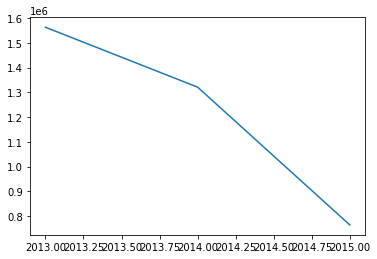

In [107]:
train_all = train.groupby(by='year')['item_cnt_day'].sum()
plt.plot(train_all)

# Продажи по месяцам

В последний месяц продажи возрастают

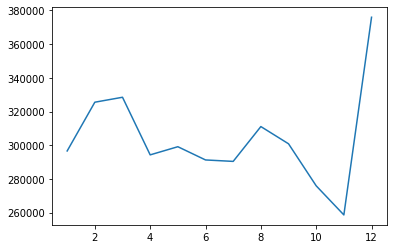

In [106]:
train_all = train.groupby(by='month')['item_cnt_day'].sum()
plt.plot(train_all)

# Продажи по дням недели

Пик продаж приходится на 5й день

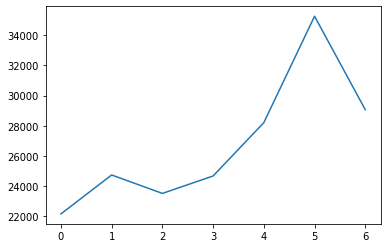

In [79]:
ms_weekdays = train[train['item_id'] == most_sold_item].groupby(by='weekday name')['item_cnt_day'].sum()
plt.plot(ms_weekdays)

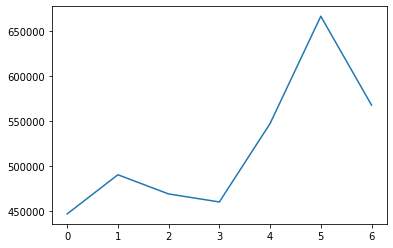

In [80]:
train_all = train.groupby(by='weekday name')['item_cnt_day'].sum()
plt.plot(train_all)

# Магазины с наибольшими продажами

In [32]:
most_sold_shop = train.groupby(by='shop_id')['item_cnt_day'].sum().sort_values(ascending=False)
most_sold_shop_id = list(most_sold_shop[:10].index)
most_sold_shop_id

[31, 25, 54, 28, 42, 57, 27, 6, 58, 46]

Сезонность и тренд

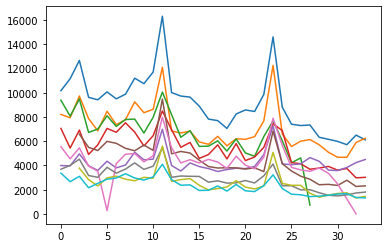

In [33]:
for id in most_sold_shop_id:
  plt.plot(train[train['shop_id'] == id].groupby(by='date_block_num')['item_cnt_day'].sum())

# Магазины со средними продажами

In [24]:
most_sold_shop_ids = train.groupby(by='shop_id')['item_cnt_day'].sum().sort_values(ascending=False)
most_sold_shop_ids = list(most_sold_shop_ids[27:33].index)
most_sold_shop_ids

[29, 38, 43, 52, 41, 59]

Чем меньше продаж изначально, тем сильнее тренд на снижение со временем

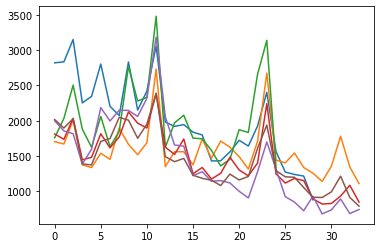

In [25]:
for id in most_sold_shop_ids:
  plt.plot(train[train['shop_id'] == id].groupby(by='date_block_num')['item_cnt_day'].sum())

# Магазины с низкими продажами

Магазины с наиеньшими продажами либо только начали продавать, либо уже закончили

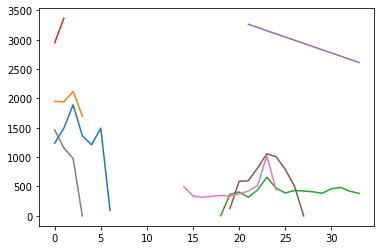

In [39]:
most_sold_shop_ids = train.groupby(by='shop_id')['item_cnt_day'].sum().sort_values(ascending=False)
least_sold_shop_ids = list(most_sold_shop_ids[50:].index)
for id in least_sold_shop_ids:
  plt.plot(train[train['shop_id'] == id].groupby(by='date_block_num')['item_cnt_day'].sum())

Поведение продаж по магазинам, у которых стабильно есть продажи разительно отличается от тех, у кого нет стабильности


При этом только 2 магазина с такими продажами есть в test. 

In [40]:
len(set(test.shop_id.unique()) - set(least_sold_shop_ids))

40

In [42]:
len(set(test.shop_id.unique()))

42

# Магазины с продажами по конкретному продукту

In [38]:
most_sold_shop_ids_month = train.groupby(by=['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].sum().sort_values(ascending=False)

Процент высоко продаваемых товаров в отдельных магазинах в месяц

In [44]:
print(f"{(len(most_sold_shop_ids_month[most_sold_shop_ids_month > 50]) / len(most_sold_shop_ids_month) * 100):.2f}", "%")

0.18 %


По количетсву товаров с высокими продажами можно сделать вывод, что это не ошибка

In [49]:
len(most_sold_shop_ids_month[most_sold_shop_ids_month > 50])

2865

С низкими продажами

Продажи варьируются от 1 до 2

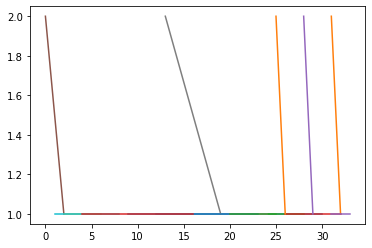

In [20]:
most_sold_shop_ids = train.groupby(by=['shop_id','item_id'])['item_cnt_day'].sum().sort_values(ascending=False)
least_sold_shop_ids = list(most_sold_shop_ids[200000:200015].index)
for s_id, i_id in least_sold_shop_ids:
  plt.plot(train[(train['shop_id'] == s_id) & (train['item_id'] == i_id)].groupby(by='date_block_num')['item_cnt_day'].sum())
#most_sold_shop_ids.plot()

Со средними продажами

Продажи около 5

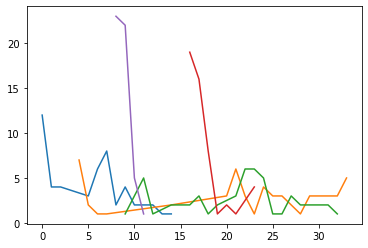

In [21]:
least_sold_shop_ids = list(most_sold_shop_ids[10000:10005].index)
for s_id, i_id in least_sold_shop_ids:
  plt.plot(train[(train['shop_id'] == s_id) & (train['item_id'] == i_id)].groupby(by='date_block_num')['item_cnt_day'].sum())
#most_sold_shop_ids.plot()

С высокими продажами

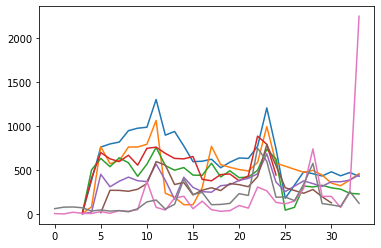

In [19]:
least_sold_shop_ids = list(most_sold_shop_ids[:8].index)
for s_id, i_id in least_sold_shop_ids:
  plt.plot(train[(train['shop_id'] == s_id) & (train['item_id'] == i_id)].groupby(by='date_block_num')['item_cnt_day'].sum())
#most_sold_shop_ids.plot()

Из графиков и квартилей видно, что большинство продаж - это 1-2 товара в месяц. При этом есть довольно высокие продажи(их немного). Поэтому, в качестве метрики надо брать такую, чтобы она одинакого оценивала ошибки на больших и на маленьких продажах.

In [74]:
most_sold_shop_ids.describe()

count    1.609124e+06
mean     2.267200e+00
std      8.649882e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.253000e+03
Name: item_cnt_day, dtype: float64

# *Магазины*

In [82]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


shop_name содержит название города и название тц через пробел

In [83]:
shop_split = shops['shop_name'].str.split(' ')

!Якутск, Сергиев Посад

In [84]:
shop_city = shop_split.map(lambda x: x[0])


*   'Орджоникидзе, 56',
 'Орджоникидзе, 56 фран' франшиза?
*   'ТРК "Мегацентр Горизонт"',
 'ТРК "Мегацентр Горизонт" Островной',
*   'ул. Чкалова 39м?',
 'ул. Чкалова 39м²




In [85]:
shop_name = shop_split.map(lambda x: " ".join(x[1:]))
shops['shop_name'] = shop_name
shops['shop_city'] = shop_city
shops.head()

,shop_name,shop_id,shop_city
0,"Орджоникидзе, 56 фран",0,!Якутск
1,"ТЦ ""Центральный"" фран",1,!Якутск
2,"ТЦ ""Мега""",2,Адыгея
3,"ТРК ""Октябрь-Киномир""",3,Балашиха
4,"ТЦ ""Волга Молл""",4,Волжский


# Категории

In [86]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


То есть категорий может быть 2, а может и одна

In [87]:
ic_split = item_categories['item_category_name'].str.split(' - ')


In [88]:
category = ic_split.map(lambda x: x[0])
category

0                            PC
1                    Аксессуары
2                    Аксессуары
3                    Аксессуары
4                    Аксессуары
                ...            
79                    Служебные
80                    Служебные
81      Чистые носители (шпиль)
82    Чистые носители (штучные)
83             Элементы питания
Name: item_category_name, Length: 84, dtype: object

In [89]:
sub_category = ic_split.map(lambda x: x[1] if len(x) == 2 else None)
sub_category

0     Гарнитуры/Наушники
1                    PS2
2                    PS3
3                    PS4
4                    PSP
             ...        
79                  None
80                Билеты
81                  None
82                  None
83                  None
Name: item_category_name, Length: 84, dtype: object

In [90]:
item_categories['category'] = category
item_categories['sub_category'] = sub_category

In [91]:
item_categories.head()

,item_category_name,item_category_id,category,sub_category
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP


# Графики

Изменение продаж каждый месяц по годам

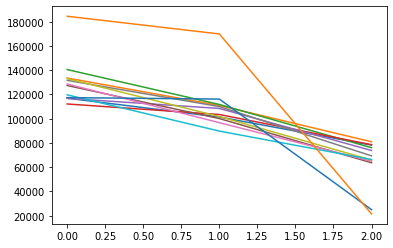

In [28]:
tmy = train.groupby(by=['month', 'year'])['item_cnt_day'].sum()
i = 0
l = []
for i1 in tmy.index:
  l.append(tmy.loc[i1])
  i+=1
  if i == 3:
    plt.plot(l)
    l = []
    i = 0

Изменение продаж по месяцам каждый год

В последний год к концу 2015 года продажи уменьшились, в то время как общая  тенденция на увеличение. Возможно, просто мало данных

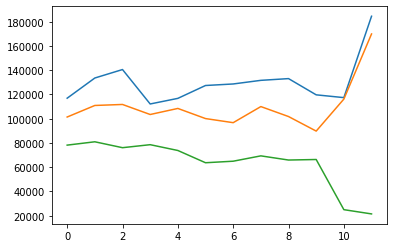

In [69]:
tmy = train.groupby(by=['year', 'month'])['item_cnt_day'].sum()
i = 0
l = []
for i1 in tmy.index:
  l.append(tmy.loc[i1])
  i+=1
  
  if i == 12:
    plt.plot(l)
    l = []
    i = 0

# Выводы:


*   Количество проданных товаров может быть отрицательно
*   В количестве продаж присутствует тренд на снижение
*   Все магазины, что есть в test, есть и в train
*   В test есть некоторые товары, которых нет в train
*   В начале месяца резкое увеличение продаж
*   В конце года продажи резко увеличиваются
*   Продажи увеличиваются на 5й день недели
*   Новый пункт








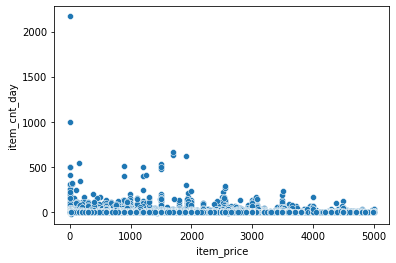

In [82]:
sns.scatterplot(data=t, x="item_price", y="item_cnt_day")